**LİNEER REGRESYON**

In [34]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
df = pd.read_csv("C:\\Users\\rbesli\Desktop\\ders12\\engine_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\rbesli\AppData\Local\Temp\ipykernel_2420\1590612803.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("C:\\Users\\rbesli\Desktop\\ders12\\engine_data.csv")


In [36]:
X = df[["Engine rpm","Lub oil pressure","Fuel pressure","Coolant pressure","lub oil temp","Coolant temp"]]

y = df["Engine Condition"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

GridSearchCV

In [37]:
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100]}  

ridge = Ridge()


grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring="neg_mean_squared_error") 
#cv = cross validation. veri kaç parçaya bölüneceğini gösterir
#scoring -> neg_mean_squared_error. 

grid_search.fit(X_train, y_train)

print("Ridge - GridSearchCV En iyi Parametreler:", grid_search.best_params_)
print("Ridge - En İyi CV Skoru (MSE):", -grid_search.best_score_)  # Negatif değeri pozitife çeviriyoruz

Ridge - GridSearchCV En iyi Parametreler: {'alpha': 100}
Ridge - En İyi CV Skoru (MSE): 0.20984844893128507


Lasso 

In [38]:
ridge_default = Ridge(alpha=1.0)
ridge_default.fit(X_train, y_train)

lasso_default = Lasso(alpha=1.0, max_iter= 5000)
lasso_default.fit(X_train, y_train)

y_pred_ridge = ridge_default.predict(X_test)
y_pred_lasso = ridge_default.predict(X_test)

print("Ridge Default - MSE:", mean_squared_error(y_test, y_pred_ridge), "R kare skoru: ", r2_score(y_test, y_pred_ridge))

Ridge Default - MSE: 0.2136164022297687 R kare skoru:  0.0870337703659737


In [41]:
import optuna

def objective_ridge(trial):
    alpha1 = trial.suggest_loguniform("alpha", 1e-3, 1e3)
    #0.001 ile 1000 arasında bir aralık belirlenir.
    model = Ridge(alpha=alpha1)
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test) #seçilen alpha ne kadar iyi seçilmiş.
    return -mean_squared_error(y_test, y_pred)



In [ ]:
run_ridge = optuna.create_study(direction="maximize")
run_ridge.optimize(objective_ridge, n_trials=50)


print("═" * 50)
print("OPTUNA RIDGE OPTIMIZATION SONUÇLARI")
print("═" * 50)
print(f"En iyi alpha: {run_ridge.best_params['alpha']:.6f}")
print(f"En iyi skor (Negatif MSE): {run_ridge.best_value:.4f}")
print(f"En iyi MSE: {-run_ridge.best_value:.4f}")
print(f"En iyi deneme no: {run_ridge.best_trial.number}")

#Sonuca göre iki çıkarım yapılır. Ya veri seti çok temiz. Ya da elimizde çok fazla özellik (feature) yok.

[I 2025-09-17 13:58:20,829] A new study created in memory with name: no-name-d48ef26f-6b32-4f6f-9382-1c823be1b6be
C:\Users\rbesli\AppData\Local\Temp\ipykernel_2420\4242131859.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha1 = trial.suggest_loguniform("alpha", 1e-3, 1e3)
[I 2025-09-17 13:58:20,838] Trial 0 finished with value: -0.21361671758058912 and parameters: {'alpha': 79.12375775587806}. Best is trial 0 with value: -0.21361671758058912.
C:\Users\rbesli\AppData\Local\Temp\ipykernel_2420\4242131859.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha1 = trial.suggest_loguniform("alpha", 1e-3, 1e3)
[I 2025-09-17 13:58:20,846] Trial 1 finished with value:

══════════════════════════════════════════════════
OPTUNA RIDGE OPTIMIZATION SONUÇLARI
══════════════════════════════════════════════════
En iyi alpha: 0.001025
En iyi skor (Negatif MSE): -0.2136
En iyi MSE: 0.2136
En iyi deneme no: 45
{'alpha': 0.001025476545830268}


In [55]:
best_ridge = Ridge(alpha=run_ridge.best_params["alpha"])
best_ridge.fit(X_train, y_train)
y_pred_ridge_opt = best_ridge.predict(X_test)

In [56]:
import matplotlib.pyplot as plt

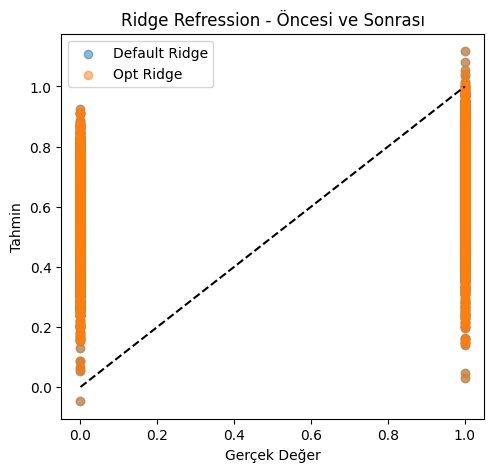

In [57]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label="Default Ridge")
plt.scatter(y_test, y_pred_ridge_opt, alpha=0.5, label="Opt Ridge")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--")
plt.xlabel("Gerçek Değer")
plt.ylabel("Tahmin")
plt.title("Ridge Refression - Öncesi ve Sonrası")
plt.legend()
plt.show()

Veri setinizde çok az parametre, küçük bir probleminiz varsa (birkaç yüz kombinasyon) GridSearchCV tercih edilebilir.

Veri seti büyükse, aralık genişse ve çok parametre varsa RandomizedSearchCV tercih edilir.

Hesap pahalı / verimli denemesi istersen Bayesian Opt (Optuna) tekniği tercih edilir.

Deep Learning / pahalı deneyler, paralel trials varsa Population-Based Training veya Optuna + Pruner tercih edilir.

Multi-objective : Bazı durumlarda sadece doğru opt. değil, hız ve hafıza kıllanımı da önemli olursa bu hiperparametre opt. tekniğini tercih ederiz.